## Reinforcement Learning
## Project: Train a Smartcab to Drive

-----

## Getting Started
This project is about constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing the driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?* 

**Answer: **

The smartcab *did not move* at all during the simulation (the state was not updated).

The driving agent is receiving both negative and positive rewards.
- If the light is red, and since the agent was idle, it received a *positive reward*. 
- If the light is green and there is no oncoming traffic, the cab took no action and was given a *negative reward*.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- In the `agent.py` python file, following are the details of some flags:
    1. `grid_size` (while creating the environment) - It sets the number of intersections in our world. The default is (8, 6), giving a total of 48 intersections. We can increase of decrease this parameter, and it will change the intersections in the environment, and therefore changing the complexity of the environment. If we increase the `grid_size`, there will be more number of intersections, and a greater chance of our agent to fail (due to some accident).
    2. `learning` (while creating the agent) - It forces the agent to use Q-learning, therefore changing its state instead of being idle forever.
    3. `log_metrics` (while creating the simulator) - If set to `True`, it will log the simulation results to a log file.


- In the `environment.py` python file: `act()` is called when an agent performs an action. This function checks whether the action is legal and performs that action if it is. The agent then receives the reward based on the action performed.


- In the `simulator.py` python file:

 `render_text()` is used to display the simulated data as text in the command prompt/terminal *(non-GUI)*. This text can also be logged in a log file.
 
 `render()` on the other hand provides a GUI render display of the simulation, in addition to the details provided by the `render_text()` function.
 
 
 - In the `planner.py` python file: the `next_waypoint()` function will first consider the *East-West* direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


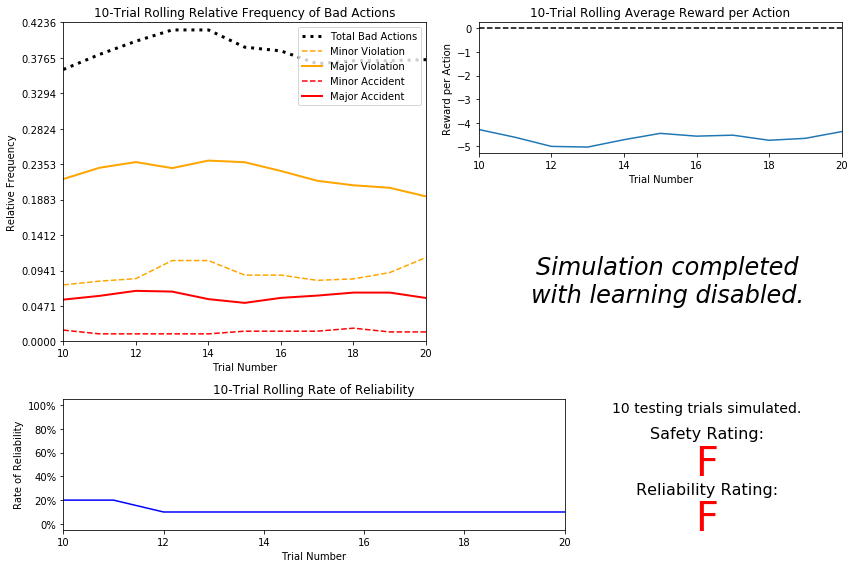

In [98]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- The driving agent is making **bad decisions ~40% of the time on an average, for each trial**. Also, approx. **25% of the bad decisions cause accidents** (either major or minor).

- Given that the agent is driving randomly, *we can never be sure what decision would it take next*. The rate of reliability might be around 15 to 20%, but it **does not make any sense**, as the next time we run the agent, it might end up doing something completely diffenent (because - randomness).

- Looks like the agent received an **average of -4.5 rewards per action, for each trial**. **Yes**, there is a high chance that the agent has been penalized heavily, but since it ocasionally made some *'correct'* moves, the average rewards it got did not go extremely low.

- As of the distribution that we have now, the outcome of the actions **does not seem to change significantly** with increase in the number of trials (because ultimately, it's all random). But, once our agent starts learning, the number of trials might be an important factor.

- **No**. The cab cannot be considered either safe or reliable for the pasengers.
    - The *safety rating and the reliability rating are both 'F'*, indicating that the agent has caused atleast one major accident, and it failed to reach the destination on time for atleast 60% of the trips.
    - Further, our agent is *Random!* We could not depend on randomness to determine whether our agent is safe/reliable.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: the code in agent.py should reflect the features chosen in this answer.
*

**Answer:**

- **`waypoint`**: This determines which direction should the smartcab move in the next step. Up until now, this was random, so probably not of any use. But, out agent will eventually learn and choose the best direction to reach the destination. It is also important because based on the direction that the agent chooses, it will receive the rewards for choosing that direction. This will help improving the **efficiency** of our smartcab.

- **`inputs`**: These 2 `inputs` are extremely important for the **safety** of out smartcab.
    - **`light`**: One of the most important 'input' that the agent will receive. It will tell whether the agent can move in any direction (forward, left, or right), based on whether the light is `'red'` or `'green'`.
    - **`oncoming`**: If the oncoming vehivle will go straight, and our smartcab also wants to go straight, it's not a problem. But, for any other situation, there is a possibility of an accident.
    

- **Excluding:**
    - **`deadline`**: Because, it is a continuous value, and will therefore increase out *state space drastically*. Also, our smart cab will take the most optimal steps in order to reach the destination, according to the other 2 features. Enforcing a deadline could *compromise the safety of the smartcab*, since the deadline might alter the decision taken by the `waypoint` and the `inputs`, and could possibly result in an *accident*.
    
    - **`inputs`**: The intended direction of the `right` and `left` would not matter since at a time, only the North-South direction, or the East-West direction will be open for our smartcab.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  

**Answer:**

- `waypoint` could have **3** possible values (`forward`, `left` or `right`)
    - It will be `None` only when the smartcab would have reached its destination.
- `light` could be either `True` or `False`
- `oncoming` could be either `forward`, `left`, `right`, `None`

Therefore, **there are a total of 24 possible states, with 4 actions each**.

Yes, I think the agent *could* learn as our state space is really compact, and includes only the most relevant features. These features as mentioned above are *necessary* for both safety and efficiency. The model can learn the best policy for each of the 24 states.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

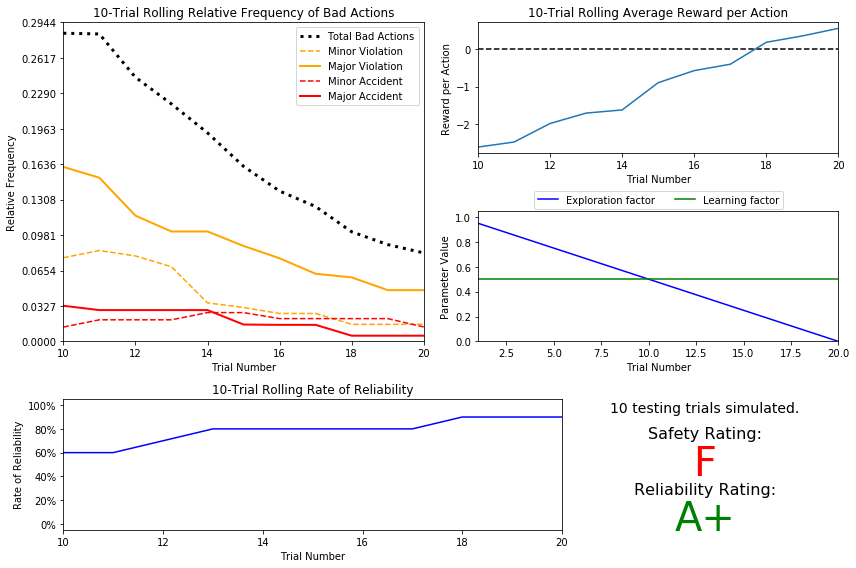

In [97]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

- The *Total Bad Actions* made by our smartcab decreased as it learned. Although, it seems like the smartcab was not able to prevent accidents (major or minor). The agent did improve in terms of not causing a violation (major or minor), and that was what led to the decrease in *Total Bad Actions*. But since it still got in accidents, the *Safety Rating* was very low ('F').
- The *Rate of Reliability* significantly increased. It makes sense, because, after all our agent is learning. In fact, the agent got 'A+' in terms of *Reliability*, meaning it reached the destination in time, for *all* of its trips.
- But, we can observe that the *Safety Rating* of the agent is 'F'. This is probably because the decay of epsilon is linear (and very steep). Since we are decaying the `epsilon` by 0.05 after each trial, given the initial value of `epsilon` as 1, our agent gets only 20 training trials. With this number, our agent is not able to derive a policy (an optimal policy) for each of the 24 states and therefore is being involved in accidents.
- The agent got rewards (average for each trial) in range from -2 to 1. This suggests that the agent was *not* heavily penalized.
- One thing that I observe is that the trend of rewards that the agent get, for each trial, that trend is almost similar to what the agent received when it wasn't learning (basic agent).
- The agent got 20 trials, given the value of `epsilon` as 1, `tolerance` as 0.05 and decaying epsilon at the rate of 0.05 per trial. This decay rate is a bit high, as our agent is not able to train enough to get a decent policy for each of the 24 states. Either the decay rate should be minimized, or the tolerance should be lowered.
- Yes, the decaying function is accurately represented in the visualization. It got to 0.0 in exactly 20 training trials, in a linear fasion.
- Our new agent is very reliable as compared to our old (not-learned) agent. But, in terms of Safety, both of the agents are extremely poor. Also, since the safety rating of our new agent is same as the one which was not learning, the new agent is of no use (atleast from the customes's point of view !)

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

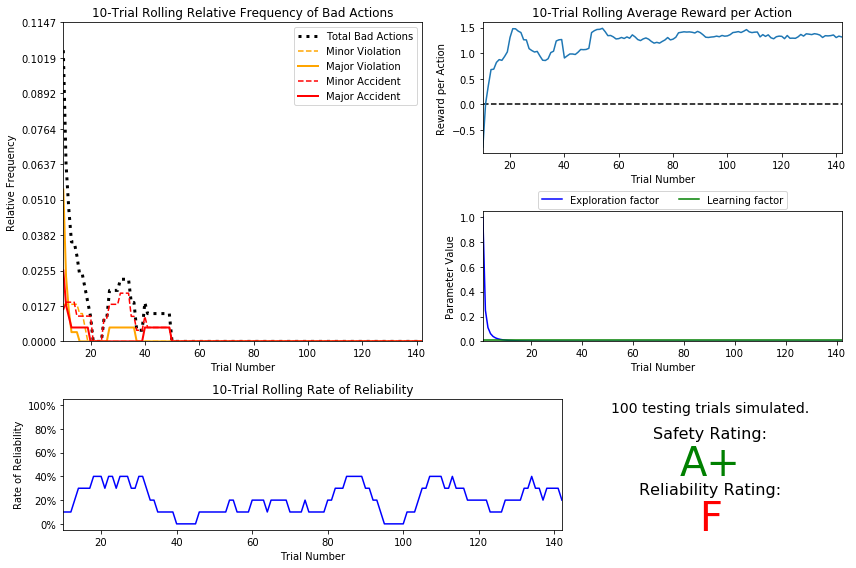

In [3]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

# alpha = 0.01
# epsilon = 1.0
# tolerance = 0.00005

# Decay function -> epsilon = 1 / (trials * trials)

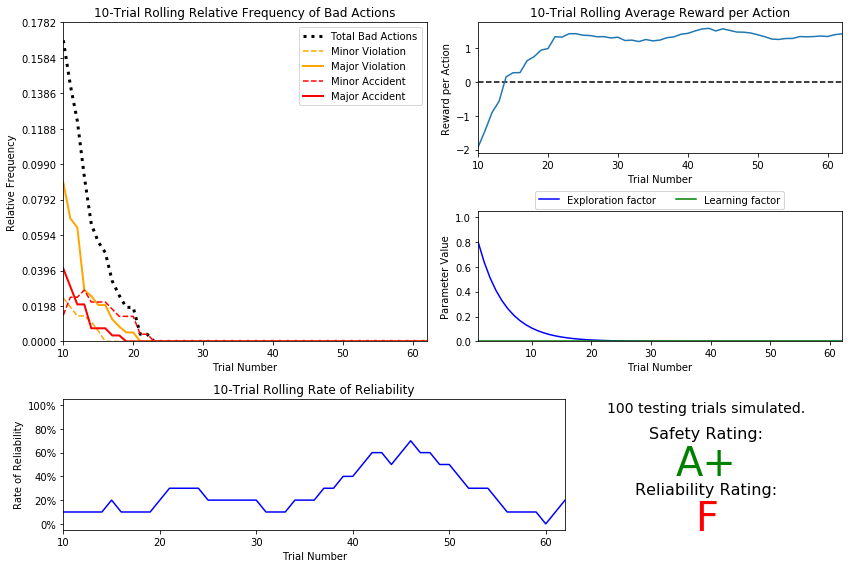

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

# alpha = 0.005
# epsilon = 1.0
# tolerance = 0.000001

# Decay function -> epsilon = (0.8 ^ trials)

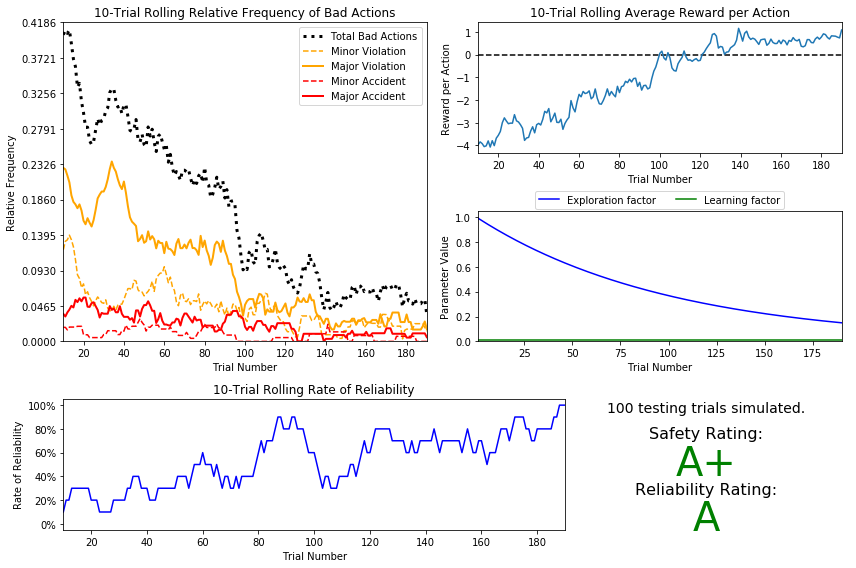

In [101]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

# alpha = 0.01
# epsilon = 1.0
# tolerance = 0.15

# Decay function -> epsilon = exp(-1 * alpha * trials)

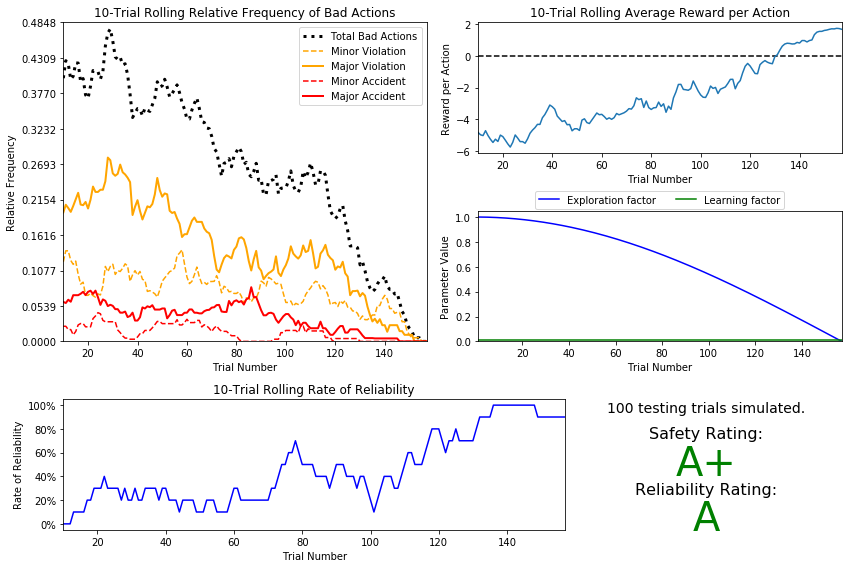

In [102]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

# alpha = 0.01
# epsilon = 1.0
# tolerance = 0.01

# Decay function -> epsilon = cos(alpha * trials)

### The model with cosine decay function is chosen
- It requires comparitively less number of trials.
- Gives almost the same result
- Converges really fast in the end, as compared to the model with exponential dacay function, which runs 200 trials more in order to reach the same threshold.

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

- I tried a couple of decaying functions, the most appropriate one I found to be was - 
  $$\epsilon = \cos(at), \textrm{for } 0 < a < 1$$
  
- The agent performed approximately 155 training trials before it reached the tolerance, and began testing.
- `epsilon`: 1.0 , `alpha`: 0.01, `tolerance`: 0.01
  
  My aim was to train the agent in a reasonable number of trials, and produce good results in testing. I figured that given we have 24 states, maybe the model should be able to derive a decent policy for each of these states within 200 trials. So, keeping that in mind, thses were the values I thought were most appropriate (and simple ofcourse). Also, the decay rate was gradual, i.e., it gave sufficient number of trials to our agent to train.
    - The other agent where I used the exponential decaying function also produced identical results, but it required about 500 trials to go below the same tolerance.
- There was a drastic improvement. The *Total Bad Actions* gradually went down and after a 140 training trials, it became almost 0. This means there was a decrease in both accidents and violations caused by our agent. The reliability of out agent had its ups and downs, but eventually, it got over 90%. But, in this case, out default agent had a 100% reliability rate. But its sensible because the default agent had no safety. Our improved agent did good on both safety as well as reliability combined.

```
(('waypoint', 'forward'), ('light', 'green'), ('oncoming', 'forward'))
 -- forward : 0.50
 -- right : 0.06
 -- None : -0.59
 -- left : 0.06
```
 - This is one of the policies learned by our improved agent. By looking at the values, we can intuitively say that our agent got a pretty decent policy for the possible states that it could be in.
 
 - I am definitely satisfied with the safety and reliability ratings of my agent. 
     - I even got an 'A+' for both of them, but the next time I ran the same (after setting a random seed), it became what it is.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:**

| **State** | **Action** | **Policy** |
| :---: | :----: | :----: |
| **((waypoint, right), (light, red), (oncoming, forward))** | None | *Optimal* |
| **((waypoint, right), (light, red), (oncoming, forward))** | forward | Incorrect |
| **((waypoint, right), (light, red), (oncoming, forward))** | right | Suboptimal |
| **((waypoint, right), (light, red), (oncoming, forward))** | left | Incorrect |


- Below is a visualization of the above situation. (:-p)

                                    |     |     |
                                    |     |     |
                                    |     |     |
                                    |     |     |
                                    |     |     |
                                    |     |     |
                                    |  O  |     |
               _____________________|  |  |     |_____________________
                                       |  
                                      \_/    
               ---------------------            ---------------------
                                               /--->
               _____________________          /   _____________________
                                    |     |  |  |
                                    |     |  A  |
                                    |     |     |
                                    |     |     |
                                    |     |     |
                                    |     |     |
                                    |     |     |
                                    |     |     |
                                    
- Here, 'A' is our agent, and 'O' is the oncoming car.

- Also, the light is red, so, our agent should not move at all, no matter what. Hence the optimal policy is *None*.
- However, we can see that if the agent goes *right* (which it intends to), it would not be the cause of any accident. Only a traffic rule violation. Hence, this is the suboptimal policy.

- But, if the agent goes straight, its incorrect, as it is not the direction the agent is supposed to go in order to reach its destination. Same goes for taking the left. In fact, if the agent goes left, there is a very high chance of a major accident.

I found this state in the `sim_improved-learning.txt`: 

```
(('waypoint', 'right'), ('light', 'red'), ('oncoming', 'forward'))
 -- forward : -1.61
 -- right : -0.22
 -- None : 0.20
 -- left : -2.23
```
 
- As we can see, the highest reward has been given to take no action (*None*), which is the optimal policy. Following, going *right* has will give the agent the next highest reward (as our suboptimal policy). The other two actions give the least reward, with *left* giving the worst reward, as the safety of the smartcab is compromised.

- Below are few other examples showing that our smartcab learned the optimal policy:

```
(('waypoint', 'right'), ('light', 'green'), ('oncoming', 'forward'))
 -- forward : 0.08
 -- right : 0.44
 -- None : -0.39
 -- left : 0.03
 
(('waypoint', 'right'), ('light', 'green'), ('oncoming', None))
 -- forward : 0.28
 -- right : 1.14
 -- None : -2.07
 -- left : 0.31
 
    - Here, since the light is green, and oncoming is None, therefore, the highest reward will be received for going to right. Also, taking no action (None) in such an event will lead to heavy penalty (relatively).
 
```

- Following is the policy which I think is not optimal.
```
(('waypoint', 'left'), ('light', 'green'), ('oncoming', 'left'))
 -- forward : 0.11
 -- right : 0.10
 -- None : -0.97
 -- left : 0.82
```

- We can see that in a situation like this, there is a high chance of an accident between our agent and the oncoming car. In this case, *left* should not be the optimal policy. Instead, keeping safety in mind, *None* should be the optimal policy. I think these are the kind of situations which our agent could not derive an optimal policy.


- The `state` dictionary:

    `key`: a tuple with any possible combination of valid values the features can take.
    
    `value`: a dictionary with rewards for each action if taken.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

There is one such characteristic that I could think of - **Safety**. This I think is related to the *smartcab* itself. If the cab gets additional rewards for reaching the destination (goal), there might be such a situation when the reward for moving in a particulat direction (towards the destination) will provide a higher reward than taking no action (None) due to the red light. In such a case, the agent will cross the red light, and this might cause an accident.